In [34]:
from sklearn import cross_validation
from sklearn.ensemble import GradientBoostingClassifier

# The error metric. In this case, we will use c-stat (aka ROC/AUC)
from sklearn.metrics import roc_auc_score

# An efficient data structure. 
import pandas as pd

In [51]:
# Import the data
df = pd.read_csv("train.csv")

In [52]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [53]:
# Impute Age with mean
df["Age"].fillna(df.Age.mean(), inplace=True)

In [54]:
df.drop(["PassengerId","Name"],axis=1,inplace=True)

In [55]:
# Change the Cabin variable to be only the first letter or None
def clean_cabin(x):
    try:
        return x[0]
    except TypeError:
        return "None"

df["Cabin"] = df.Cabin.apply(clean_cabin)

In [56]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.000000,1,0,A/5 21171,7.2500,None,S
1,1,1,female,38.000000,1,0,PC 17599,71.2833,C,C
2,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,None,S
3,1,1,female,35.000000,1,0,113803,53.1000,C,S
4,0,3,male,35.000000,0,0,373450,8.0500,None,S
5,0,3,male,29.699118,0,0,330877,8.4583,None,Q
6,0,1,male,54.000000,0,0,17463,51.8625,E,S
7,0,3,male,2.000000,3,1,349909,21.0750,None,S
8,1,3,female,27.000000,0,2,347742,11.1333,None,S
9,1,2,female,14.000000,1,0,237736,30.0708,None,C


In [121]:
def getAccuracy(X,y,num_folds = 10,seed = 7,num_trees = 100,loss='deviance',learning_rate=0.1,max_depth=3,min_samples_split=2,min_samples_leaf=1,min_weight_fraction_leaf=0,subsample=1,max_features=None,max_leaf_nodes=None):
    num_instances = len(X)
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed,loss=loss,learning_rate=learning_rate,max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,min_weight_fraction_leaf=min_weight_fraction_leaf,subsample=subsample,max_features=max_features,max_leaf_nodes=max_leaf_nodes)
    numeric_variables = list(X.dtypes[X.dtypes != "object"].index)
    results = cross_validation.cross_val_score(model, X[numeric_variables], y, cv=kfold)
    model.fit(X, y)
    gbm_preds = model.predict_proba(X)[:, 1]
    gbm_performance = roc_auc_score(y, gbm_preds)
    return results.mean(),gbm_performance,model.feature_importances_

In [94]:
columns=['Pclass', 'Sex', 'Age','SibSp', 'Parch', 'Cabin', 'Embarked', 'Fare']

In [95]:
categoricalColumns=['Sex','Cabin', 'Embarked']


In [97]:
import itertools

maxAccuracy=0.0
matchedColumn={}
matchedColumnAUC={}
combs = []

for i in range(1, len(columns)+1):
    els = [list(x) for x in itertools.combinations(columns, i)]
    for entry in els:
        combs.append(entry)
'''print combs'''

for columnCombi in combs:
    if not isinstance( columnCombi, int ):
        '''print columnCombi
        print "\n"'''
        X=pd.DataFrame()
        for entry in columnCombi:
            X[entry]=df[entry]
            if entry in categoricalColumns:
                '''print entry'''
                X[entry] = X[entry].astype('category')
        '''print X.dtypes'''
        X=X.dropna(axis=0)
        cat_columns = X.select_dtypes(['category']).columns
        X[cat_columns] = X[cat_columns].apply(lambda x: x.cat.codes)
        '''print X'''
        
        X['survived']=df['Survived']
        y=X['survived']
        X=X.drop(['survived'],axis=1)
        accuracy,logit_roc_auc,features=getAccuracy(X,y)
        
        '''print "accuracy %f \n" % accuracy'''
        str=', '.join(columnCombi)
        matchedColumn[str]=accuracy
        matchedColumnAUC[str]=logit_roc_auc
        if maxAccuracy  < accuracy:
            MaxX=X
            maxAccuracy=accuracy
import operator
sorted_x = sorted(matchedColumn.items(), key=operator.itemgetter(1), reverse=True)
sorted_auc = sorted(matchedColumnAUC.items(), key=operator.itemgetter(1), reverse=True)

In [98]:
print ("max auc columns,auc : ")
print (sorted_auc[0])
print ("accuracy columns,auc : ")
print (matchedColumn[sorted_auc[0][0]])

max auc columns,auc : 
('Pclass, Sex, Age, SibSp, Parch, Embarked, Fare', 0.94546233794064072)
accuracy columns,auc : 
0.825651174668


In [99]:
columns=['Pclass', 'Sex', 'Age','SibSp', 'Parch', 'Embarked', 'Fare']

In [100]:
X=pd.DataFrame()
for entry in columns:
    X[entry]=df[entry]
    if entry in categoricalColumns:
        '''print entry'''
        X[entry] = X[entry].astype('category')
'''print X.dtypes'''
X=X.dropna(axis=0)
cat_columns = X.select_dtypes(['category']).columns
X[cat_columns] = X[cat_columns].apply(lambda x: x.cat.codes)
X['survived']=df['Survived']
y=X['survived']
X=X.drop(['survived'],axis=1)
accuracy,logit_roc_auc,features=getAccuracy(X,y)

In [101]:
print(logit_roc_auc)

0.945462337941


In [102]:
print(features)

[ 0.0745418   0.14332365  0.28577989  0.05131473  0.01159027  0.03514723
  0.39830244]


C:\Users\manih\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


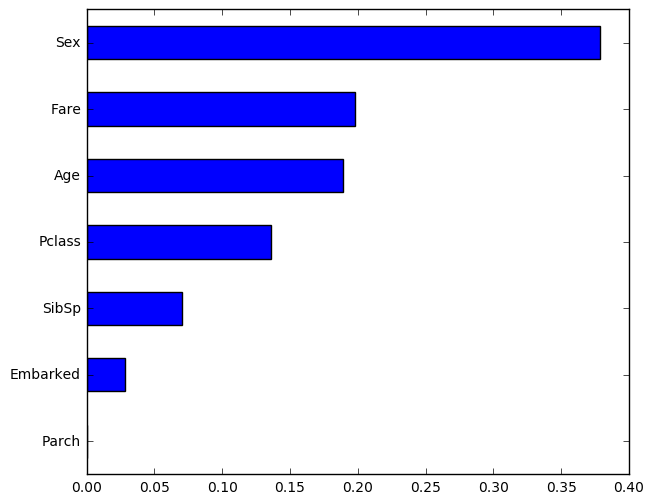

In [114]:

%matplotlib inline
# Simple version that shows all of the variables
feature_importances = pd.Series(features, index=X.columns)
feature_importances.sort(inplace=True)
feature_importances.plot(kind="barh", figsize=(7,6));

30
C-stat:
0.905807350263
accuracy
0.830158324821

50
C-stat:
0.924528554591
accuracy
0.82567671093

100
C-stat:
0.945462337941
accuracy
0.825651174668

200
C-stat:
0.96727204543
accuracy
0.831294688458

500
C-stat:
0.991240758599
accuracy
0.823429519918

1000
C-stat:
0.997382942248
accuracy
0.805413687436

2000
C-stat:
0.99905978785
accuracy
0.803153728294

3000
C-stat:
0.999183006536
accuracy
0.795275791624

5000
C-stat:
0.999204435873
accuracy
0.795288559755

10000
C-stat:
0.999204435873
accuracy
0.794139427988



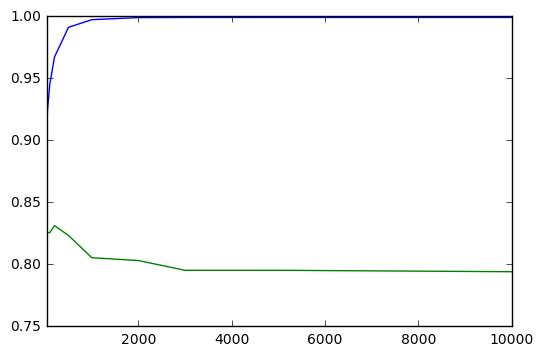

In [133]:
resultsauc = []
resultsacc = []
n_estimator_options = [30, 50, 100, 200, 500, 1000, 2000,3000,5000,10000]

for trees in n_estimator_options:
    accuracy,logit_roc_auc,features=getAccuracy(X,y,num_trees = trees)
    print(trees)
    roc = logit_roc_auc
    print ("C-stat:")
    print(roc)
    resultsauc.append(roc)
    print("accuracy")
    print(accuracy)
    resultsacc.append(accuracy)
    print("")
    
pd.Series(resultsauc, n_estimator_options).plot();
pd.Series(resultsacc, n_estimator_options).plot();

# 500 will prefer this as after this its overfitting the data

In [149]:
losses=['deviance','exponential']
learning_rates=[.1,.2,.3,.4,.5,.6,.7,.8,.9]
max_depts=[1,2,3,4,5,6,7,8,9]
min_samples_splits=[2,4,8,10]
min_samples_leafs=[1,2,5,6,7,8,9,10]
subsamples=[.2,.5,.8,1]
max_features=["auto", None, "sqrt", "log2", 0.9, 0.2]
max_leaf_nodes=[None,2,8,16,32,64]

deviance
C-stat:
0.945462337941
accuracy
0.825651174668

exponential
C-stat:
0.946991856852
accuracy
0.818896833504



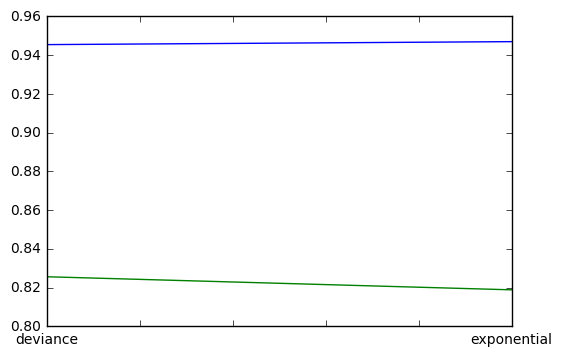

In [137]:
resultsauc = []
resultsacc = []

for loss in losses:
    accuracy,logit_roc_auc,features=getAccuracy(X,y,loss = loss)
    print(loss)
    roc = logit_roc_auc
    print ("C-stat:")
    print(roc)
    resultsauc.append(roc)
    print("accuracy")
    print(accuracy)
    resultsacc.append(accuracy)
    print("")
    
pd.Series(resultsauc, losses).plot();
pd.Series(resultsacc, losses).plot();

# deviance is better as its gaining more on accuracy than loosing on auc

0.1
C-stat:
0.945462337941
accuracy
0.825651174668

0.2
C-stat:
0.969254259081
accuracy
0.829047497446

0.3
C-stat:
0.981707382407
accuracy
0.82791113381

0.4
C-stat:
0.989389799636
accuracy
0.826787538304

0.5
C-stat:
0.993072966892
accuracy
0.815487742594

0.6
C-stat:
0.995119468552
accuracy
0.80649897855

0.7
C-stat:
0.997291867567
accuracy
0.806486210419

0.8
C-stat:
0.997163291546
accuracy
0.803153728294

0.9
C-stat:
0.997940105004
accuracy
0.793041368744



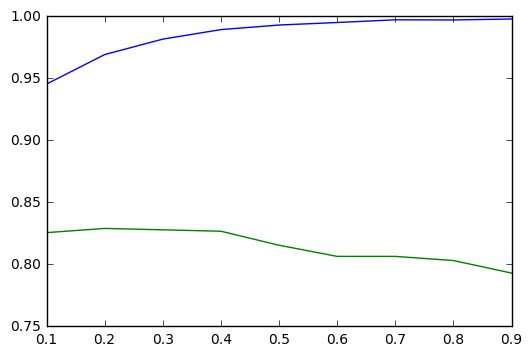

In [138]:
resultsauc = []
resultsacc = []

for learning_rate in learning_rates:
    accuracy,logit_roc_auc,features=getAccuracy(X,y,learning_rate = learning_rate)
    print(learning_rate)
    roc = logit_roc_auc
    print ("C-stat:")
    print(roc)
    resultsauc.append(roc)
    print("accuracy")
    print(accuracy)
    resultsacc.append(accuracy)
    print("")
    
pd.Series(resultsauc, learning_rates).plot();
pd.Series(resultsacc, learning_rates).plot();

# 0.4

1
C-stat:
0.869361405764
accuracy
0.8042773238

2
C-stat:
0.910591449695
accuracy
0.826800306435

3
C-stat:
0.945462337941
accuracy
0.825651174668

4
C-stat:
0.973826743812
accuracy
0.833529111338

5
C-stat:
0.99075056252
accuracy
0.831281920327

6
C-stat:
0.996927568842
accuracy
0.82003319714

7
C-stat:
0.998749062467
accuracy
0.804251787538

8
C-stat:
0.999091931855
accuracy
0.795275791624

9
C-stat:
0.999161577199
accuracy
0.80651174668



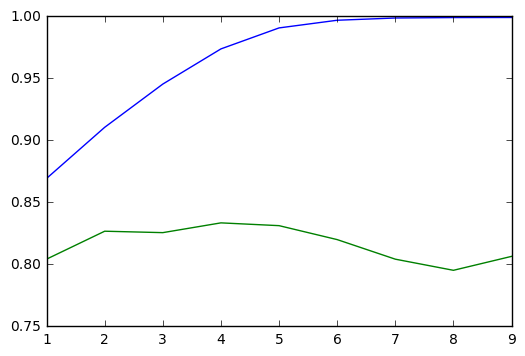

In [139]:
resultsauc = []
resultsacc = []

for max_depth in max_depts:
    accuracy,logit_roc_auc,features=getAccuracy(X,y,max_depth = max_depth)
    print(max_depth)
    roc = logit_roc_auc
    print ("C-stat:")
    print(roc)
    resultsauc.append(roc)
    print("accuracy")
    print(accuracy)
    resultsacc.append(accuracy)
    print("")
    
pd.Series(resultsauc, max_depts).plot();
pd.Series(resultsacc, max_depts).plot();

# 4

2
C-stat:
0.945462337941
accuracy
0.825651174668

4
C-stat:
0.944591771135
accuracy
0.830158324821

8
C-stat:
0.944567663131
accuracy
0.832431052094

10
C-stat:
0.944556948462
accuracy
0.829060265577



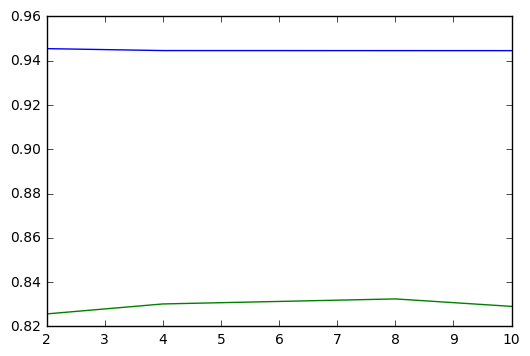

In [140]:
resultsauc = []
resultsacc = []

for min_samples_split in min_samples_splits:
    accuracy,logit_roc_auc,features=getAccuracy(X,y,min_samples_split = min_samples_split)
    print(min_samples_split)
    roc = logit_roc_auc
    print ("C-stat:")
    print(roc)
    resultsauc.append(roc)
    print("accuracy")
    print(accuracy)
    resultsacc.append(accuracy)
    print("")
    
pd.Series(resultsauc, min_samples_splits).plot();
pd.Series(resultsacc, min_samples_splits).plot();

# 8

1
C-stat:
0.945462337941
accuracy
0.825651174668

2
C-stat:
0.945355191257
accuracy
0.830183861083

5
C-stat:
0.941195221258
accuracy
0.829034729316

6
C-stat:
0.940276438444
accuracy
0.826800306435

7
C-stat:
0.939100503589
accuracy
0.829047497446

8
C-stat:
0.938310296796
accuracy
0.829047497446

9
C-stat:
0.935819136398
accuracy
0.82791113381

10
C-stat:
0.941725597343
accuracy
0.831281920327



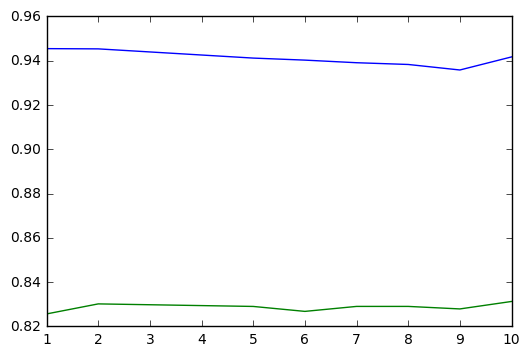

In [141]:
resultsauc = []
resultsacc = []

for min_samples_leaf in min_samples_leafs:
    accuracy,logit_roc_auc,features=getAccuracy(X,y,min_samples_leaf = min_samples_leaf)
    print(min_samples_leaf)
    roc = logit_roc_auc
    print ("C-stat:")
    print(roc)
    resultsauc.append(roc)
    print("accuracy")
    print(accuracy)
    resultsacc.append(accuracy)
    print("")
    
pd.Series(resultsauc, min_samples_leafs).plot();
pd.Series(resultsacc, min_samples_leafs).plot();

# 2

0.2
C-stat:
0.932020786457
accuracy
0.817824310521

0.5
C-stat:
0.948108861031
accuracy
0.822280388151

0.8
C-stat:
0.95150273224
accuracy
0.824553115424

1
C-stat:
0.945462337941
accuracy
0.825651174668



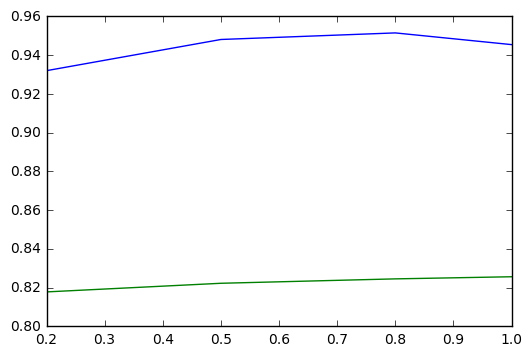

In [142]:
resultsauc = []
resultsacc = []

for subsample in subsamples:
    accuracy,logit_roc_auc,features=getAccuracy(X,y,subsample = subsample)
    print(subsample)
    roc = logit_roc_auc
    print ("C-stat:")
    print(roc)
    resultsauc.append(roc)
    print("accuracy")
    print(accuracy)
    resultsacc.append(accuracy)
    print("")
    
pd.Series(resultsauc, subsamples).plot();
pd.Series(resultsacc, subsamples).plot();

# 0.8

auto
C-stat:
0.945462337941
accuracy
0.825651174668

None
C-stat:
0.945462337941
accuracy
0.825651174668

sqrt
C-stat:
0.921407907425
accuracy
0.81781154239

log2
C-stat:
0.921407907425
accuracy
0.81781154239

0.9
C-stat:
0.943161362906
accuracy
0.827923901941

0.2
C-stat:
0.910969141755
accuracy
0.815551583248



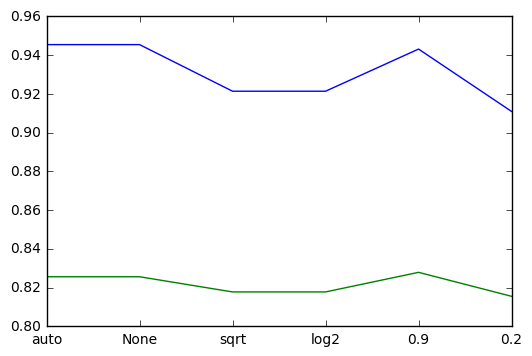

In [143]:
resultsauc = []
resultsacc = []

for max_feature in max_features:
    accuracy,logit_roc_auc,features=getAccuracy(X,y,max_features = max_feature)
    print(max_feature)
    roc = logit_roc_auc
    print ("C-stat:")
    print(roc)
    resultsauc.append(roc)
    print("accuracy")
    print(accuracy)
    resultsacc.append(accuracy)
    print("")
    
pd.Series(resultsauc, max_features).plot();
pd.Series(resultsacc, max_features).plot();

# 0.9

# resultsauc = []
resultsacc = []

for max_leaf_node in max_leaf_nodes:
    accuracy,logit_roc_auc,features=getAccuracy(X,y,max_leaf_nodes = max_leaf_node)
    print(max_leaf_node)
    roc = logit_roc_auc
    print ("C-stat:")
    print(roc)
    resultsauc.append(roc)
    print("accuracy")
    print(accuracy)
    resultsacc.append(accuracy)
    print("")
    
pd.Series(resultsauc, max_leaf_nodes).plot();
pd.Series(resultsacc, max_leaf_nodes).plot();

# 16

# Model based on above observation

In [158]:
accuracy,logit_roc_auc,features=getAccuracy(X,y,num_trees=500,max_leaf_nodes = 16,max_features=.9,subsample=.8,min_samples_leaf=2,min_samples_split=8,max_depth=4,learning_rate=.4,loss="deviance")

In [159]:
print("c stat : ")
print(logit_roc_auc)
print("accuracy : ")
print(accuracy)

c stat : 
0.999156219865
accuracy : 
0.80993360572


# The data seems to over fit even though the above parameter have been taken with considerations of accurancy through cross validation and good auc

# Final Model

In [169]:
accuracy,logit_roc_auc,features=getAccuracy(X,y,num_trees=500)

In [170]:
print("c stat : ")
print(logit_roc_auc)
print("accuracy : ")
print(accuracy)

c stat : 
0.991240758599
accuracy : 
0.823429519918
